####*Unsupervised learning is a type of machine learning where models find patterns in data without labeled outputs. Unlike supervised learning, where you have input-output pairs, unsupervised learning works with input data only. It is useful for discovering hidden structures, relationships, and groups within data*

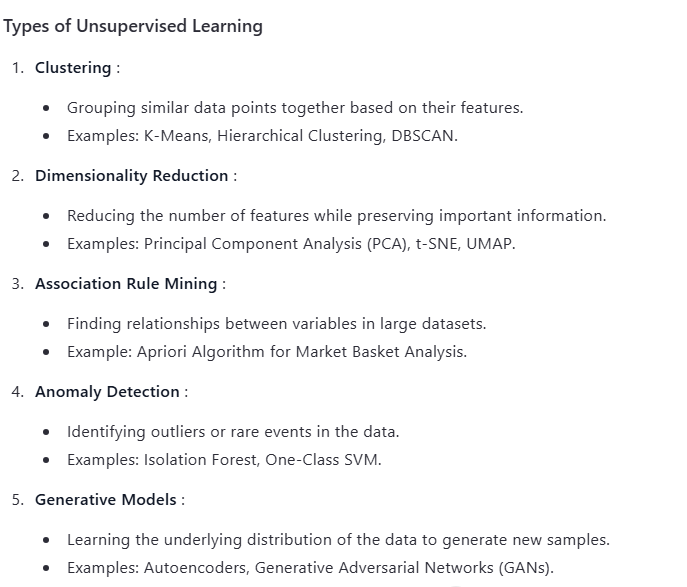

##1. Clustering: K-Means Algorithm

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


In [9]:
np.random.seed(42)
X = np.random.rand(100, 2)


In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [7]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print(labels)
print(centroids)

[2 0 1 2 0 2 0 1 2 1 1 1 2 2 1 1 2 0 1 0 2 2 2 2 1 0 0 0 1 1 1 0 2 2 2 0 2
 0 1 1 0 1 1 0 0 2 0 0 1 1 2 2 0 2 1 1 0 0 0 0 0 1 1 0 2 1 1 0 0 2 0 1 1 0
 1 0 2 0 0 2 2 0 2 1 2 1 1 1 0 0 1 0 2 0 1 2 0 1 0 0]
[[0.8039633  0.57026999]
 [0.36376248 0.20008043]
 [0.18520943 0.72228065]]


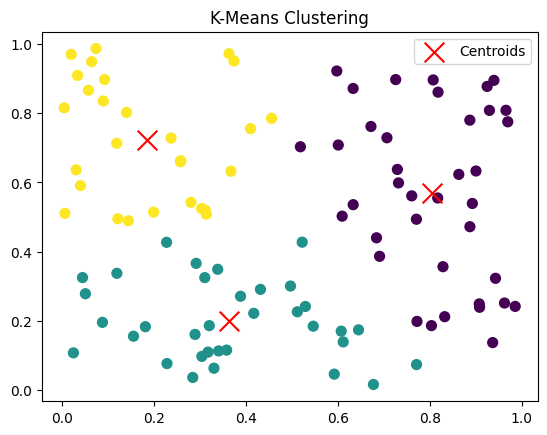

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()

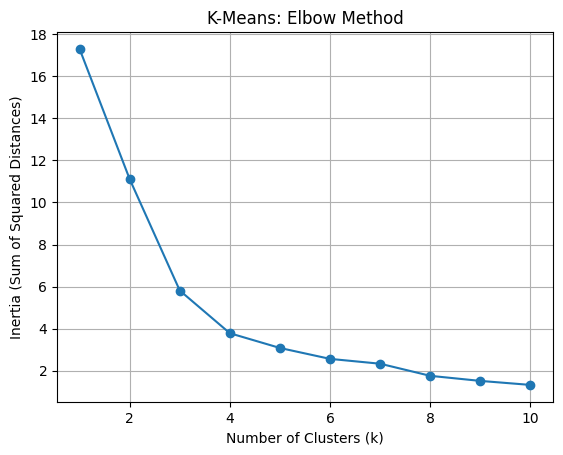

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Generate Sample Data
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 points in 2D space

# Step 2: Find Inertia for Different k Values
inertia = []
k_range = range(1, 11)  # Check k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Step 3: Plot the Elbow Curve
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('K-Means: Elbow Method')
plt.grid(True)
plt.show()


##2. Dimensionality Reduction: Principal Component Analysis (PCA)
PCA reduces the dimensionality of the data while retaining as much variance as possible. It is widely used for visualization and noise reduction.

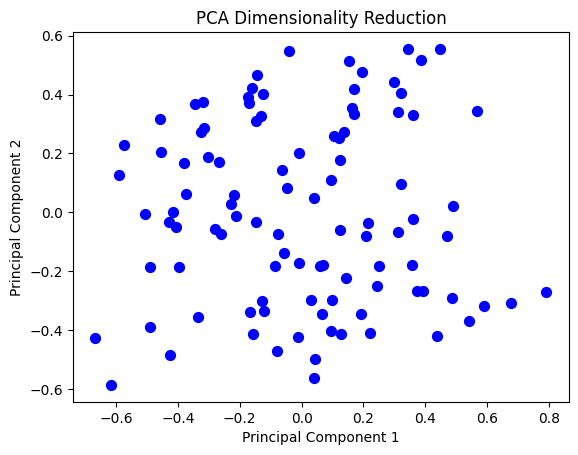

In [11]:
from sklearn.decomposition import PCA

np.random.seed(42)
X = np.random.rand(100, 4)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.scatter(X_reduced[:,0],X_reduced[:,1],c='blue',s=50)
plt.title("PCA Dimensionality Reduction")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [12]:
# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.29834838 0.27777546]


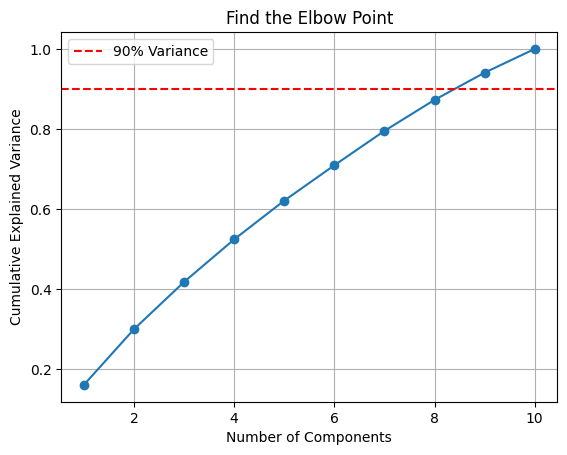

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Create Sample Data
np.random.seed(42)
X = np.random.rand(100, 10)  # 100 points in 10D space

# Step 2: Apply PCA
pca = PCA()
pca.fit(X)

# Step 3: Plot Explained Variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Find the Elbow Point')
plt.legend()
plt.grid(True)
plt.show()


## 3. Association Rule Mining: Apriori Algorithm
The Apriori algorithm is used to find frequent itemsets and association rules in transactional data.

In [19]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd

# Sample transactional data
data = {
    'Transaction': [1, 2, 3, 4, 5],
    'Items': [
        ['Milk', 'Bread', 'Butter'],
        ['Milk', 'Bread'],
        ['Milk', 'Butter'],
        ['Bread', 'Butter'],
        ['Milk', 'Bread', 'Butter']
    ]
}

# Convert to one-hot encoded DataFrame
df = pd.DataFrame(data['Items']).stack().reset_index(level=1, drop=True).rename('Item').reset_index()
one_hot = pd.crosstab(df['index'], df['Item'])

# Apply Apriori algorithm
frequent_itemsets = apriori(one_hot, min_support=0.4, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
   support               itemsets
0      0.8                (Bread)
1      0.8               (Butter)
2      0.8                 (Milk)
3      0.6        (Butter, Bread)
4      0.6          (Milk, Bread)
5      0.6         (Milk, Butter)
6      0.4  (Milk, Butter, Bread)

Association Rules:
  antecedents consequents  antecedent support  consequent support  support  \
0    (Butter)     (Bread)                 0.8                 0.8      0.6   
1     (Bread)    (Butter)                 0.8                 0.8      0.6   
2      (Milk)     (Bread)                 0.8                 0.8      0.6   
3     (Bread)      (Milk)                 0.8                 0.8      0.6   
4      (Milk)    (Butter)                 0.8                 0.8      0.6   
5    (Butter)      (Milk)                 0.8                 0.8      0.6   

   confidence    lift  representativity  leverage  conviction  zhangs_metric  \
0        0.75  0.9375               1.0     -0.04         0.8 

## 4. Anomaly Detection: Isolation Forest
Isolation Forest is an effective method for detecting anomalies in high-dimensional data.

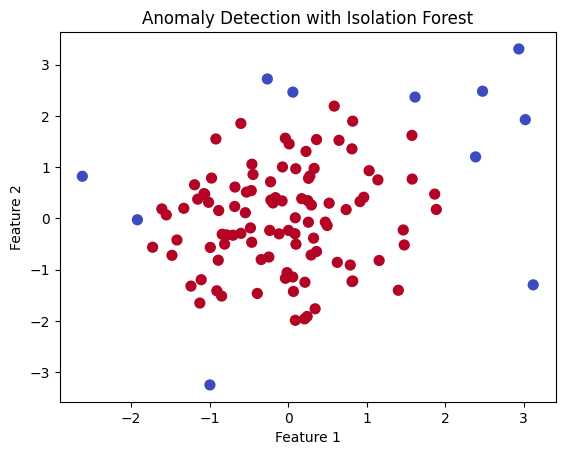

In [20]:
from sklearn.ensemble import IsolationForest

# Generate synthetic data with anomalies
np.random.seed(42)
X_normal = np.random.randn(100, 2)
X_anomalies = np.random.uniform(low=-4, high=4, size=(10, 2))
X = np.vstack([X_normal, X_anomalies])

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
y_pred = iso_forest.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', s=50)
plt.title("Anomaly Detection with Isolation Forest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## 5. Generative Models: Autoencoder
Autoencoders are neural networks used for unsupervised learning tasks like denoising and dimensionality reduction.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


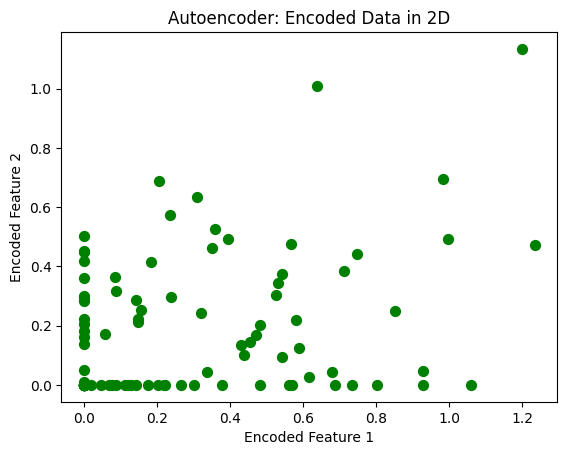

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 8)  # 100 points in 8D space

# Define an autoencoder
input_dim = X.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X, X, epochs=50, batch_size=16, shuffle=True, verbose=0)

# Encode the data
encoder = Model(inputs=input_layer, outputs=encoded)
X_encoded = encoder.predict(X)

# Plot the encoded data
plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c='green', s=50)
plt.title("Autoencoder: Encoded Data in 2D")
plt.xlabel("Encoded Feature 1")
plt.ylabel("Encoded Feature 2")
plt.show()

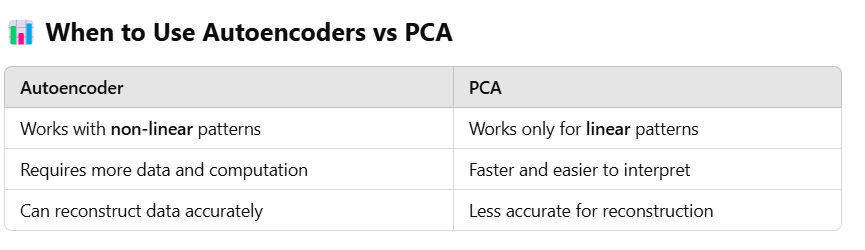